In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [2]:
data = pd.read_excel("National_Accidents_Australia.xlsx")

In [3]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"ستون {column} دارای مقادیر: {unique_values}")


ستون Calendar year دارای مقادیر: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
ستون Month دارای مقادیر: ['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
ستون ABS remoteness area دارای مقادیر: ['Major Cities' 'Missing' 'Regional' 'Remote']
ستون Cause of injury دارای مقادیر: ['All other trauma events' 'Medical events' 'Non-traffic'
 'Other transport' 'Traffic' 'Unknown traffic']
ستون Age group دارای مقادیر: ['0-7' '17-25' '26-39' '40-64' '65-74' '75+' '8-16' 'Missing']
ستون Sex دارای مقادیر: ['Female' 'Male' 'intersex or indeterminate or missing']
ستون Road user دارای مقادیر: ['Not applicable' 'Car passenger' 'Car unknown position'
 'Heavy transport passenger' 'Pedal cyclist' 'Pedestrian' 'Motorcyclist'
 'Bus occupant' 'Car driver' 'Other or unknown'
 'Pick-up truck or van occupant' 'Heavy transport unknown position'
 'Heavy transport driver']
ستون Counterparty دارای مقادیر: ['Not applicable' 'Car, pick-up truck o

In [4]:
data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,NaN,NaN,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,NaN,NaN,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,NaN,NaN,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [5]:
data.shape

(117919, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117919 entries, 0 to 117918
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Calendar year        117919 non-null  int64  
 1   Month                117919 non-null  object 
 2   ABS remoteness area  117919 non-null  object 
 3   Cause of injury      117919 non-null  object 
 4   Age group            117919 non-null  object 
 5   Sex                  117919 non-null  object 
 6   Road user            117919 non-null  object 
 7   Counterparty         117919 non-null  object 
 8   Count of cases       112982 non-null  float64
 9   Bed days             117919 non-null  int64  
 10  Died_cases           9741 non-null    float64
 11  Died_bed_days        10588 non-null   float64
 12  Hospitalisations     117919 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 11.7+ MB


In [7]:
data.describe()

,Calendar year,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
count,117919.000000,112982.000000,117919.000000,9741.000000,10588.000000,117919.000000
mean,2016.056140,913.243499,2367.263087,42.866851,382.356536,871.466948
std,3.143752,6227.102077,15855.439564,124.452898,1162.170382,6074.748945
min,2011.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2013.000000,1.000000,2.000000,1.000000,3.000000,1.000000
50%,2016.000000,3.000000,10.000000,2.000000,13.000000,2.000000
75%,2019.000000,12.000000,52.000000,11.000000,76.000000,11.000000
max,2021.000000,107434.000000,252872.000000,996.000000,9107.000000,107434.000000


In [8]:
data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,NaN,NaN,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,NaN,NaN,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,NaN,NaN,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117919 entries, 0 to 117918
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Calendar year        117919 non-null  int64  
 1   Month                117919 non-null  object 
 2   ABS remoteness area  117919 non-null  object 
 3   Cause of injury      117919 non-null  object 
 4   Age group            117919 non-null  object 
 5   Sex                  117919 non-null  object 
 6   Road user            117919 non-null  object 
 7   Counterparty         117919 non-null  object 
 8   Count of cases       112982 non-null  float64
 9   Bed days             117919 non-null  int64  
 10  Died_cases           9741 non-null    float64
 11  Died_bed_days        10588 non-null   float64
 12  Hospitalisations     117919 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 11.7+ MB


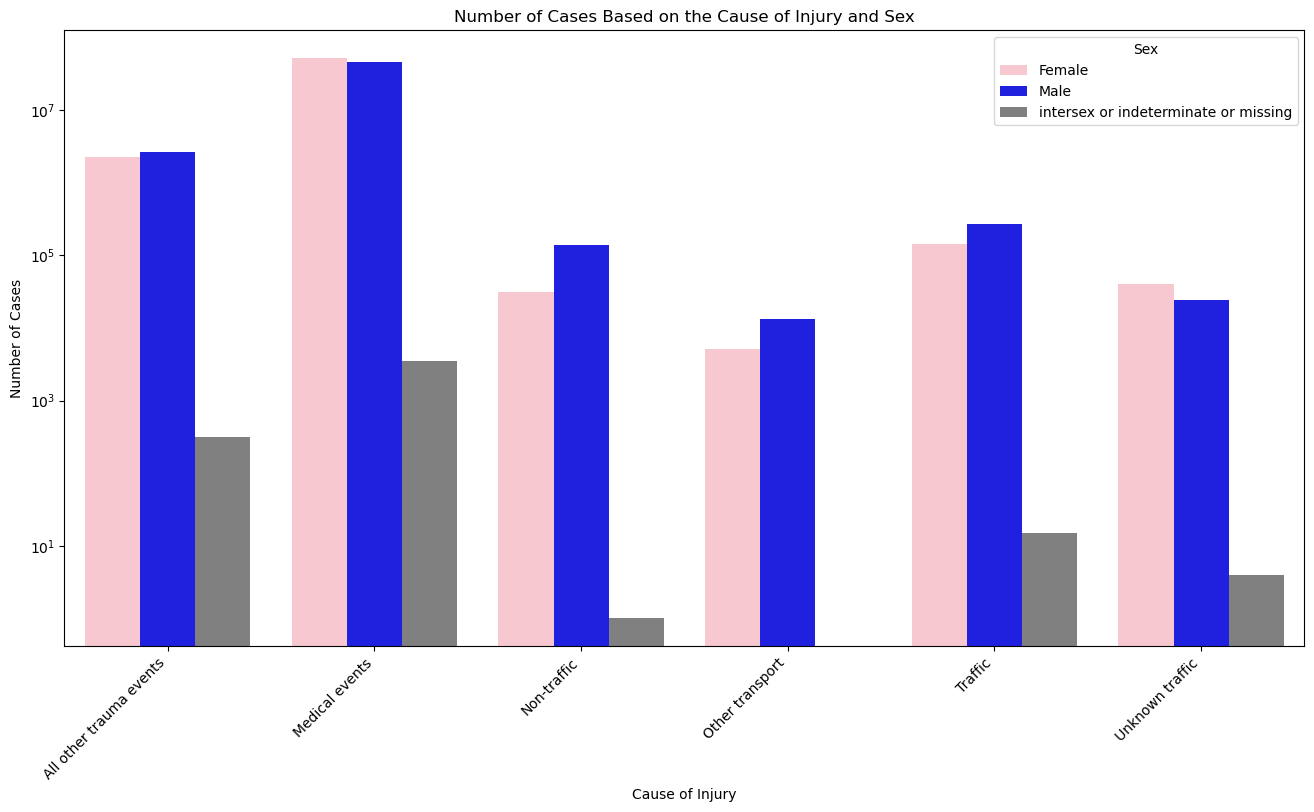

In [10]:
colors = {'Female': 'pink', 'Male': 'blue', 'intersex or indeterminate or missing': 'gray'}

plt.figure(figsize=(16, 8))
sns.barplot(x='Cause of injury', y='Count of cases', hue='Sex', data=data, ci=None,palette=colors,estimator=sum)
plt.title('Number of Cases Based on the Cause of Injury and Sex')
plt.xlabel('Cause of Injury')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  
plt.show()


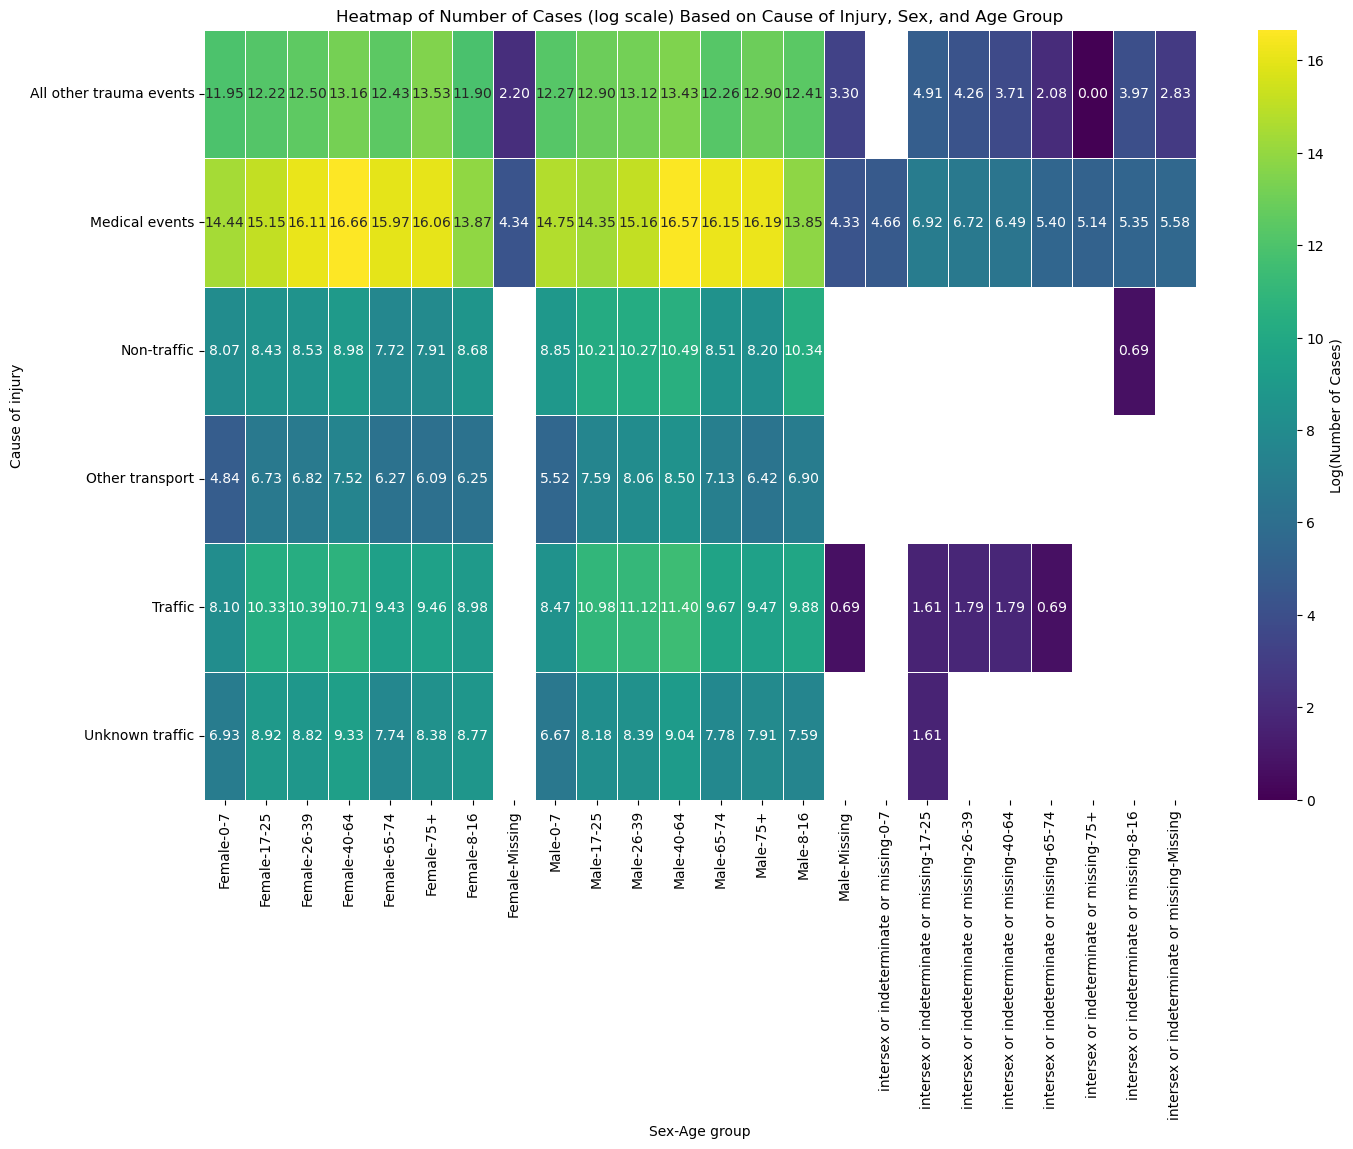

In [11]:

plt.figure(figsize=(16, 10))
heatmap_data = data.pivot_table(index='Cause of injury', columns=['Sex', 'Age group'], values='Count of cases', aggfunc='sum')
heatmap_data = np.log1p(heatmap_data)  
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', linewidths=.5, cbar_kws={'label': 'Log(Number of Cases)'})
plt.title('Heatmap of Number of Cases (log scale) Based on Cause of Injury, Sex, and Age Group')
plt.show()



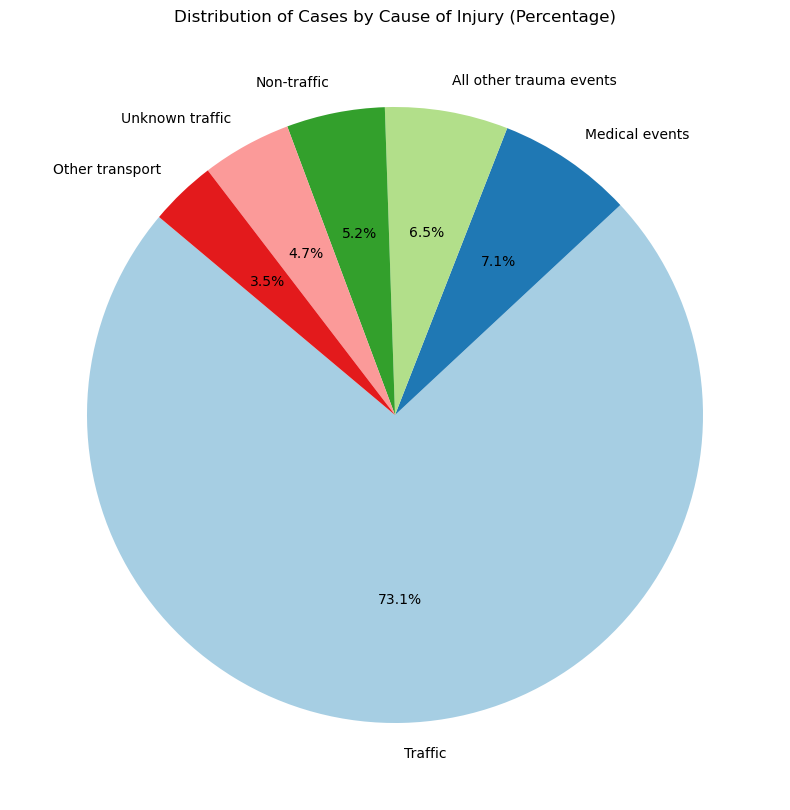

In [12]:

plt.figure(figsize=(10, 10))
cause_counts = data['Cause of injury'].value_counts()
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Cases by Cause of Injury (Percentage)')
plt.show()


In [13]:
cases_count = data.groupby(['Cause of injury', 'Sex'])['Count of cases'].sum()
print(cases_count)




Cause of injury          Sex                                 
All other trauma events  Female                                   2296874.0
                         Male                                     2649046.0
                         intersex or indeterminate or missing         319.0
Medical events           Female                                  51786715.0
                         Male                                    45778020.0
                         intersex or indeterminate or missing        3465.0
Non-traffic              Female                                     31679.0
                         Male                                      138555.0
                         intersex or indeterminate or missing           1.0
Other transport          Female                                      5210.0
                         Male                                       13164.0
Traffic                  Female                                    144754.0
                         M

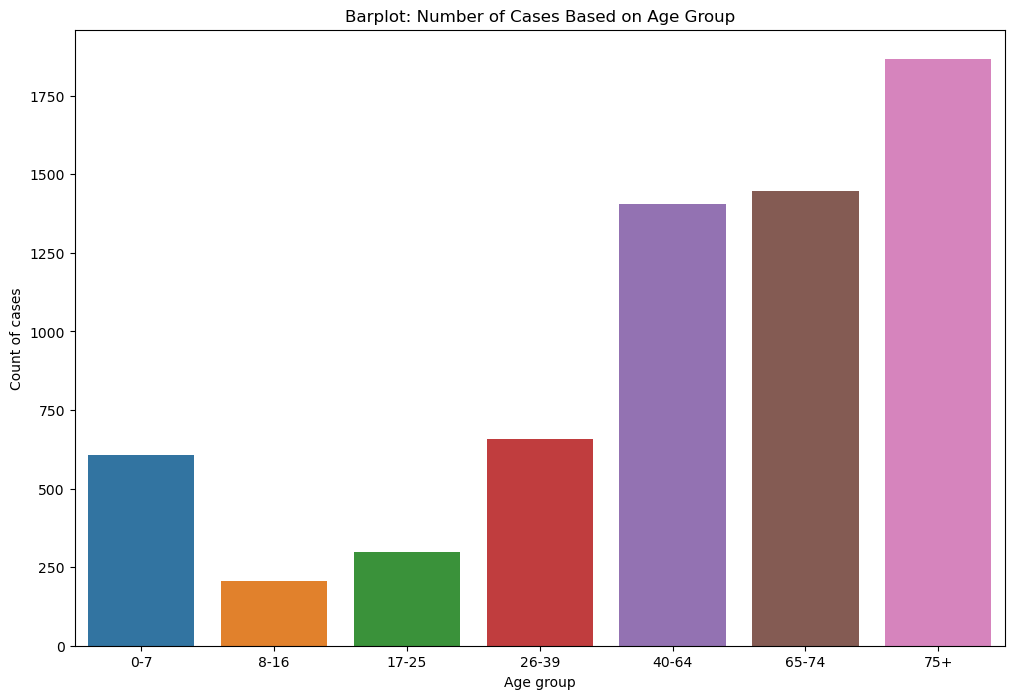

In [14]:

age_order = ['0-7', '8-16', '17-25', '26-39', '40-64', '65-74', '75+']

plt.figure(figsize=(12, 8))
sns.barplot(x='Age group', y='Count of cases', data=data, order=age_order, ci=None,)
plt.title('Barplot: Number of Cases Based on Age Group')
plt.show()



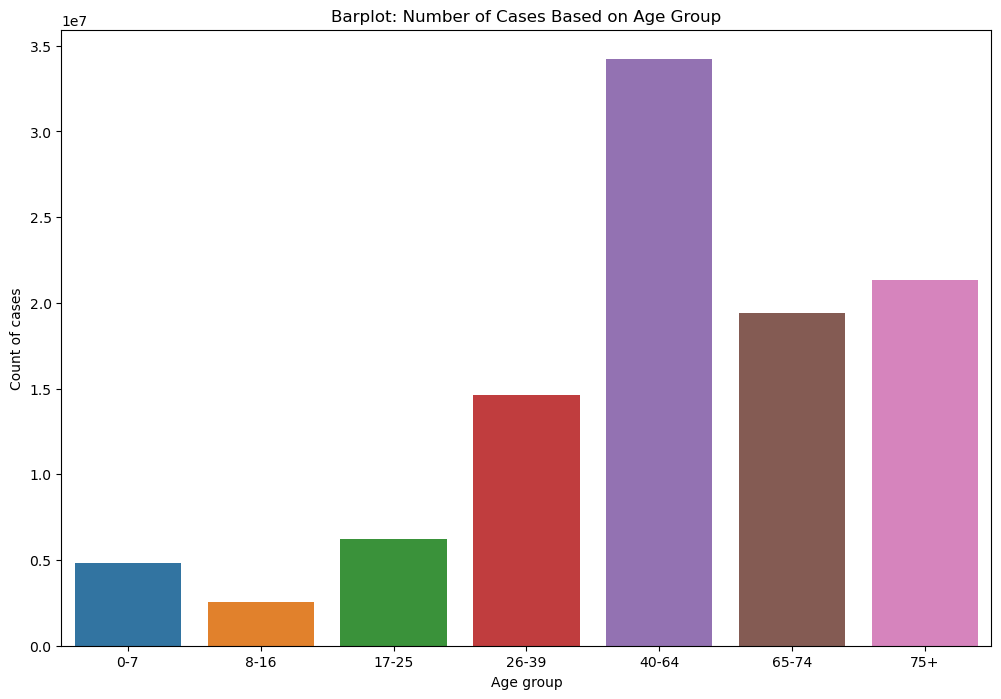

In [15]:

age_order = ['0-7', '8-16', '17-25', '26-39', '40-64', '65-74', '75+']

plt.figure(figsize=(12, 8))
sns.barplot(x='Age group', y='Count of cases', data=data , order=age_order , ci=None , estimator=sum)
plt.title('Barplot: Number of Cases Based on Age Group')
plt.show()



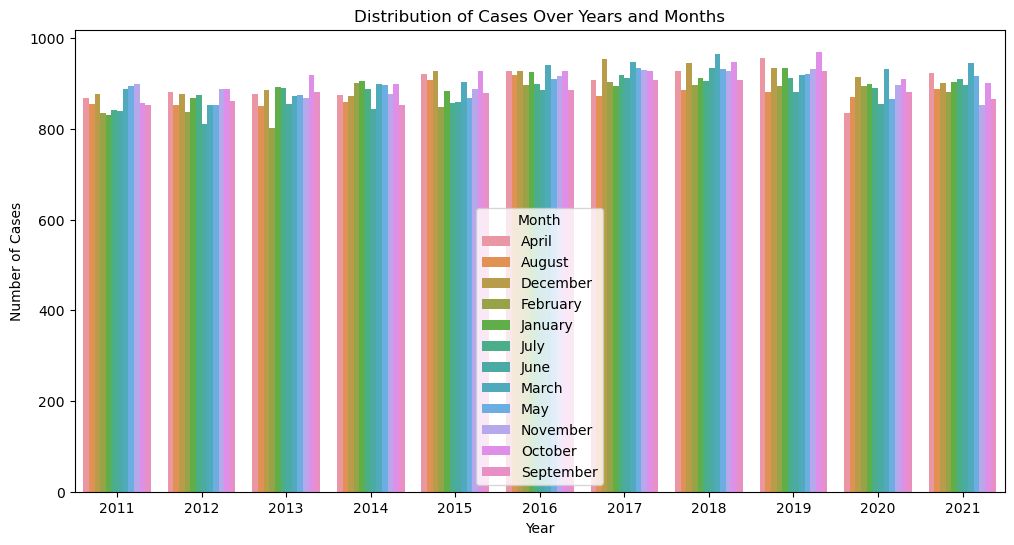

In [16]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Calendar year', hue='Month', data=data)
plt.title('Distribution of Cases Over Years and Months')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


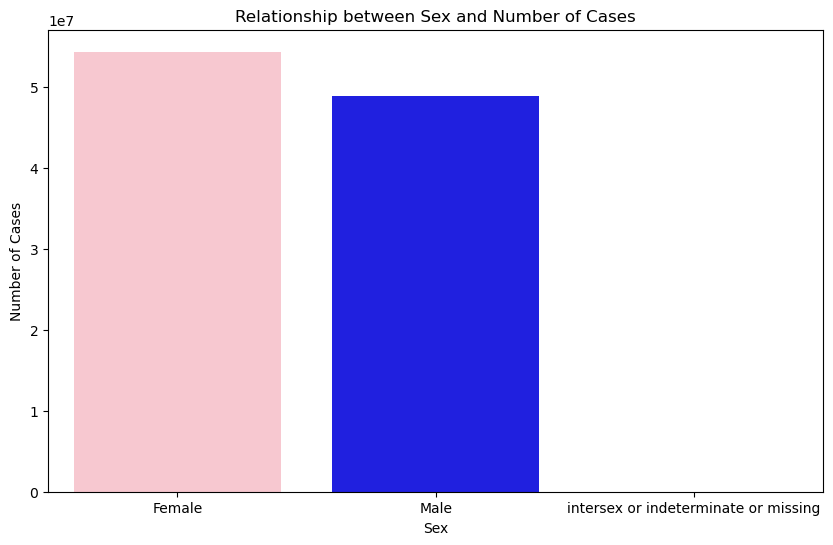

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Count of cases', data=data ,palette=colors, ci=None ,estimator=sum)
plt.title('Relationship between Sex and Number of Cases')
plt.xlabel('Sex')
plt.ylabel('Number of Cases')
plt.show()
#s

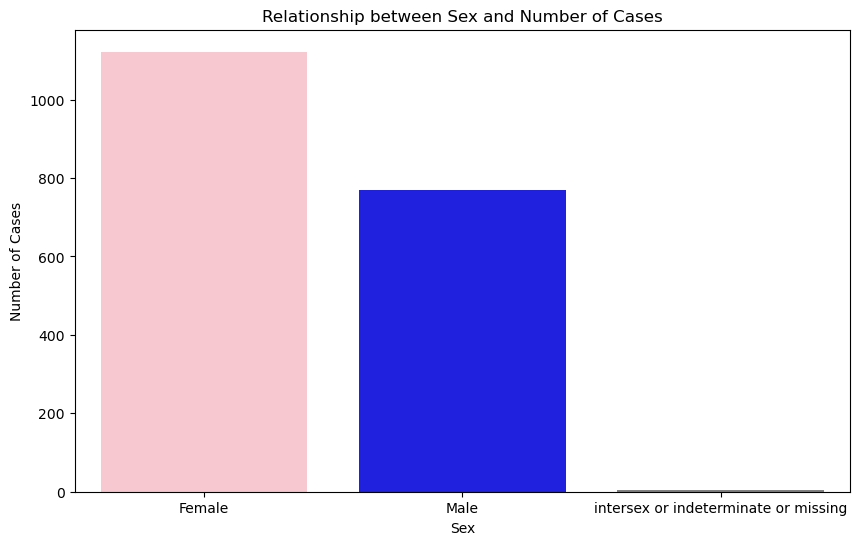

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Count of cases', data=data ,palette=colors, ci=None )
plt.title('Relationship between Sex and Number of Cases')
plt.xlabel('Sex')
plt.ylabel('Number of Cases')
plt.show()
#s

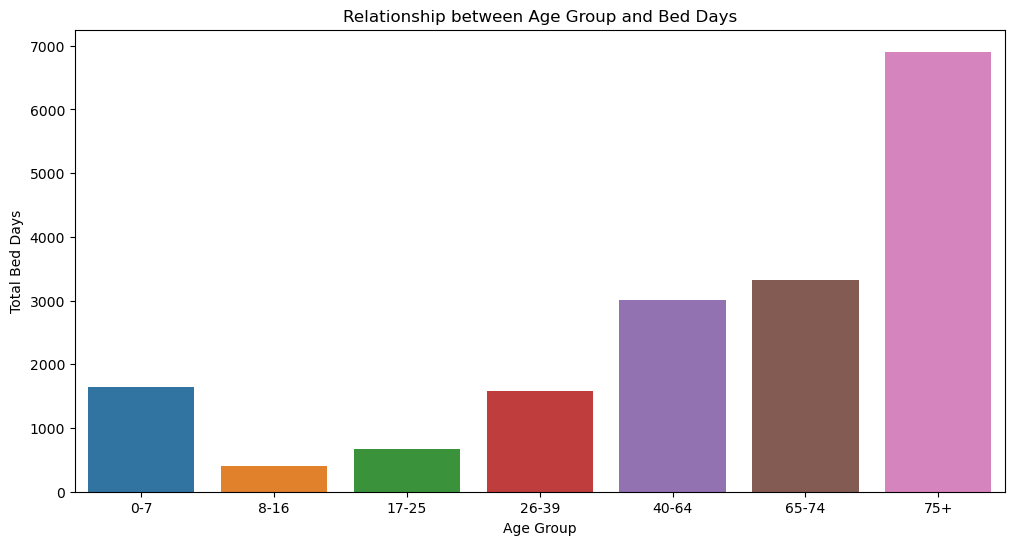

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age group', y='Bed days', data=data , ci=None ,order=age_order)
plt.title('Relationship between Age Group and Bed Days')
plt.xlabel('Age Group')
plt.ylabel('Total Bed Days')
plt.show()


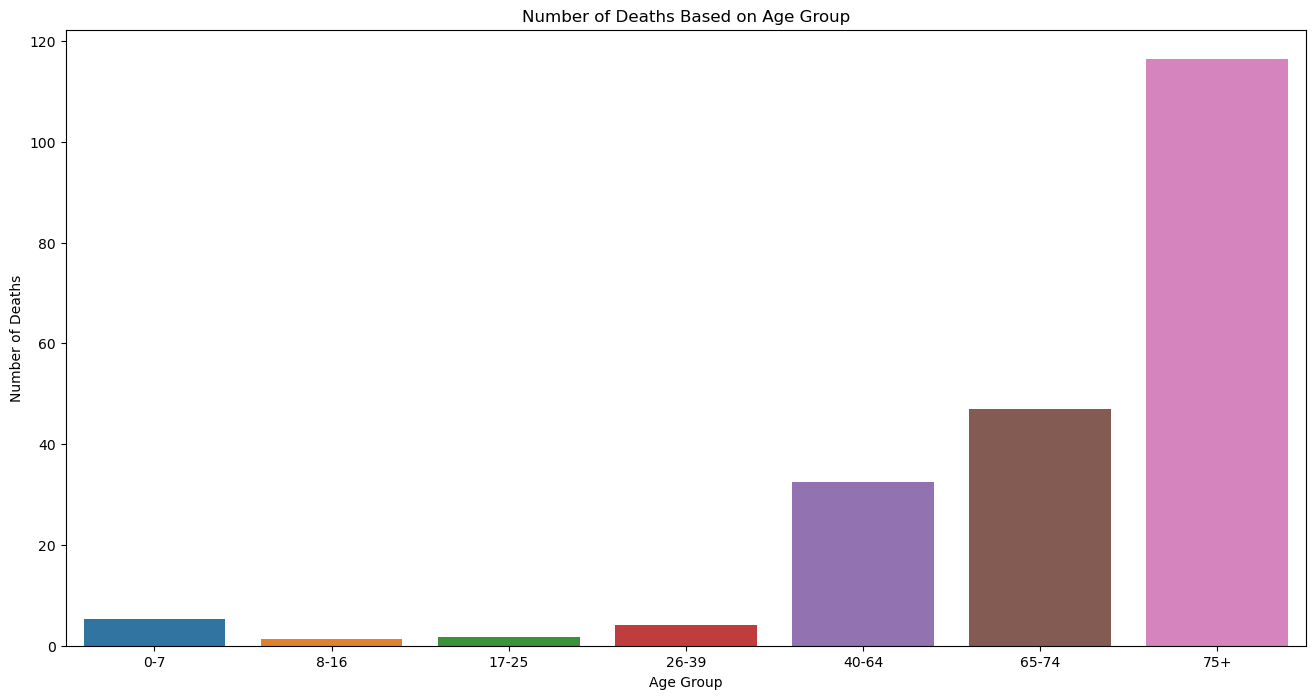

In [20]:

plt.figure(figsize=(16, 8))
sns.barplot(x='Age group', y='Died_cases', data=data, ci=None,order=age_order)
plt.title('Number of Deaths Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.show()


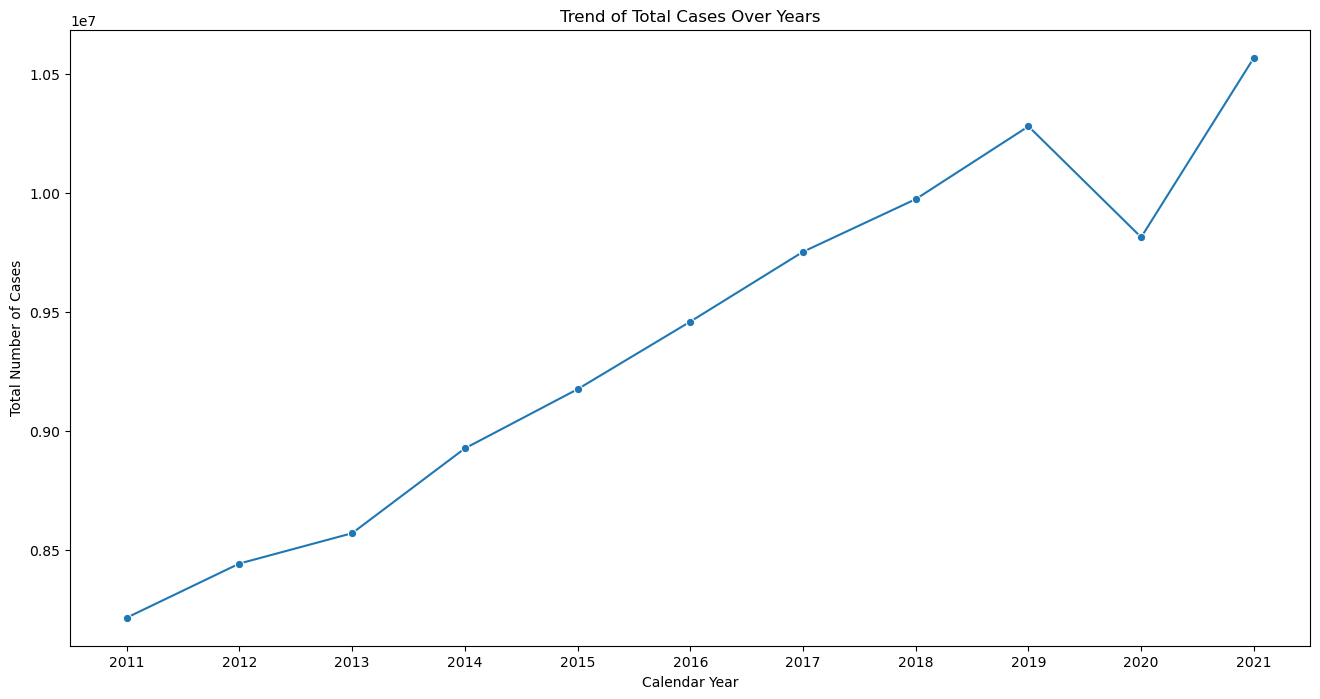

In [21]:

total_cases_per_year = data.groupby('Calendar year')['Count of cases'].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Calendar year', y='Count of cases', data=total_cases_per_year, marker='o')
plt.title('Trend of Total Cases Over Years')
plt.xlabel('Calendar Year')
plt.ylabel('Total Number of Cases')

plt.xticks(total_cases_per_year['Calendar year'])
plt.show()


# clean Data for Learn

In [22]:
data['Died_cases'].fillna(0, inplace=True)

data['Died_bed_days'].fillna(0, inplace=True)

data.dropna(subset=['Count of cases'], inplace=True)


data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,0.0,0.0,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,0.0,0.0,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,0.0,0.0,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112982 entries, 0 to 117918
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Calendar year        112982 non-null  int64  
 1   Month                112982 non-null  object 
 2   ABS remoteness area  112982 non-null  object 
 3   Cause of injury      112982 non-null  object 
 4   Age group            112982 non-null  object 
 5   Sex                  112982 non-null  object 
 6   Road user            112982 non-null  object 
 7   Counterparty         112982 non-null  object 
 8   Count of cases       112982 non-null  float64
 9   Bed days             112982 non-null  int64  
 10  Died_cases           112982 non-null  float64
 11  Died_bed_days        112982 non-null  float64
 12  Hospitalisations     112982 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 12.1+ MB


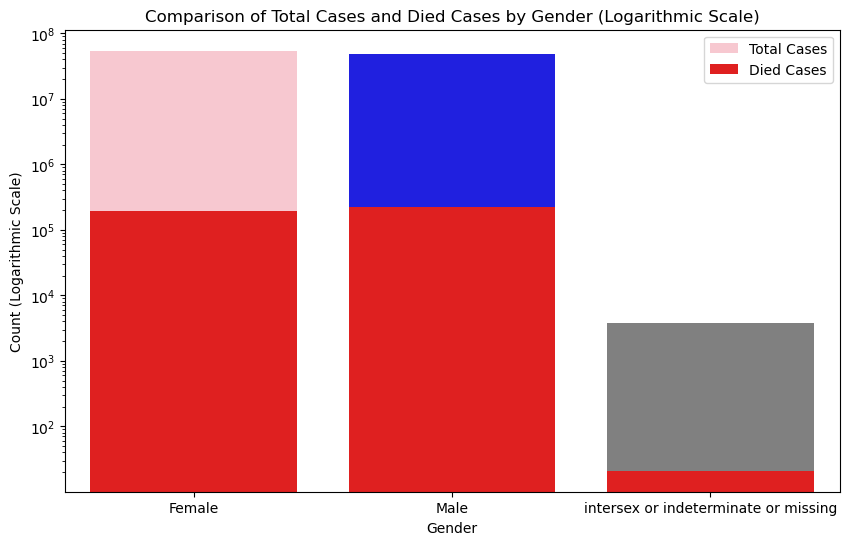

In [24]:

# گروه‌بندی بر اساس جنسیت و محاسبه تعداد موارد و مرگ‌ها
gender_data = data.groupby('Sex')[['Count of cases', 'Died_cases']].sum().reset_index()

# ایجاد نمودار مقایسه اختلافات با مقیاس لگاریتمیک برای محور Y
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Count of cases', data=gender_data, palette=colors, label='Total Cases', log=True)
sns.barplot(x='Sex', y='Died_cases', data=gender_data, color='red', label='Died Cases', log=True)
plt.title('Comparison of Total Cases and Died Cases by Gender (Logarithmic Scale)')
plt.xlabel('Gender')
plt.ylabel('Count (Logarithmic Scale)')
plt.legend()
plt.show()


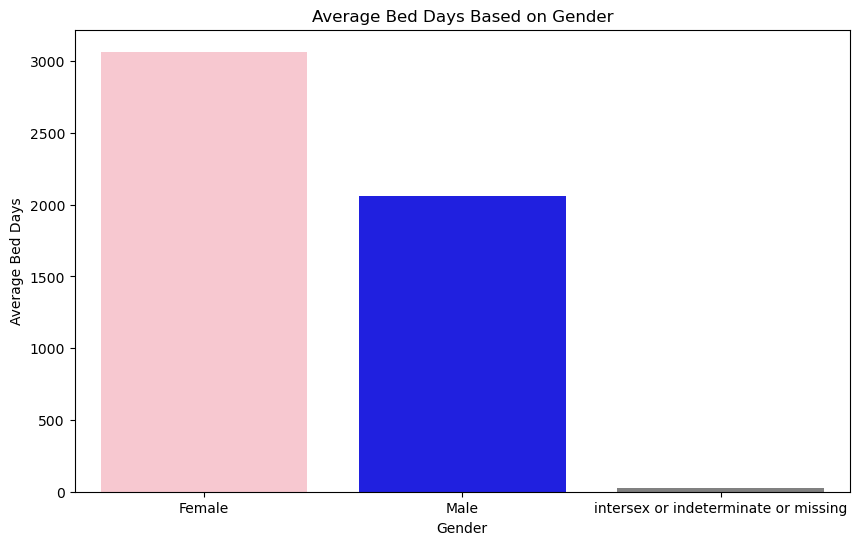

In [25]:

# گروه‌بندی بر اساس جنسیت و محاسبه میانگین تعداد روزهای بستری
gender_bed_days = data.groupby('Sex')['Bed days'].mean().reset_index()

# ایجاد نمودار میانگین تعداد روزهای بستری بر اساس جنسیت
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Bed days', data=gender_bed_days,palette=colors, color='green')
plt.title('Average Bed Days Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Average Bed Days')
plt.show()


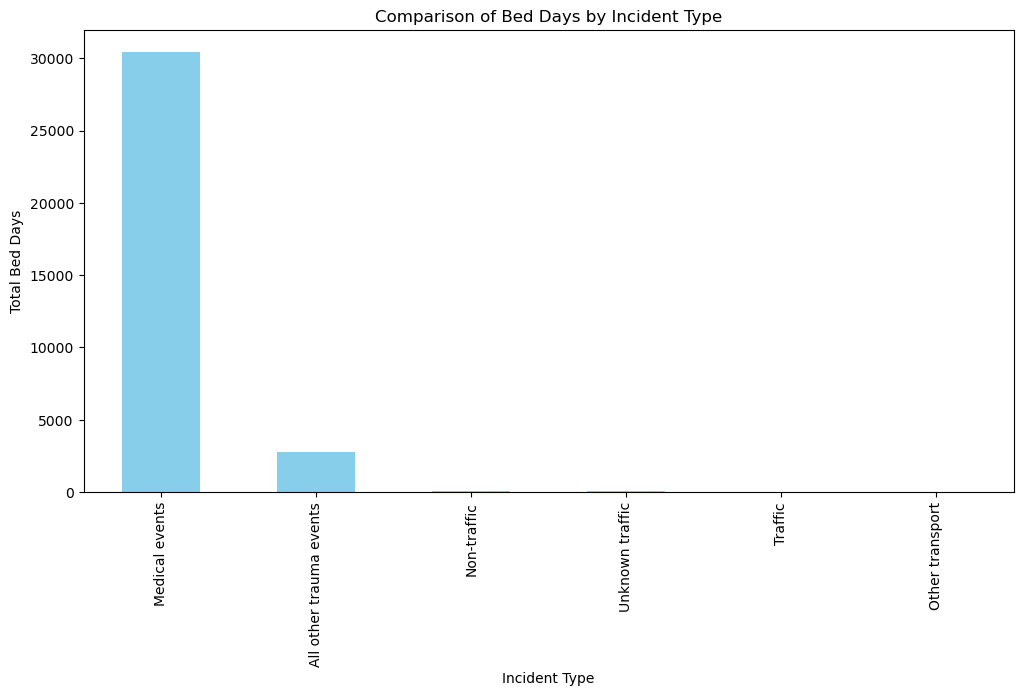

In [26]:

bed_days_by_incident = data.groupby('Cause of injury')['Bed days'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bed_days_by_incident.plot(kind='bar', color='skyblue')
plt.title('Comparison of Bed Days by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Total Bed Days')
plt.show()


In [27]:

label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['ABS remoteness area'] = label_encoder.fit_transform(data['ABS remoteness area'])
data['Cause of injury'] = label_encoder.fit_transform(data['Cause of injury'])
data['Age group'] = label_encoder.fit_transform(data['Age group'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Road user'] = label_encoder.fit_transform(data['Road user'])
data['Counterparty'] = label_encoder.fit_transform(data['Counterparty'])




In [28]:
data.head(1000)

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,0,0,0,0,0,8,5,765.0,1007,0.0,0.0,765
1,2011,0,0,0,0,1,8,5,1010.0,1694,0.0,0.0,1010
2,2011,0,0,0,1,0,8,5,859.0,1597,0.0,0.0,859
3,2011,0,0,0,1,1,8,5,2231.0,3878,2.0,3.0,2229
4,2011,0,0,0,2,0,8,5,1098.0,2347,1.0,14.0,1097
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2011,1,0,4,2,1,1,4,10.0,36,0.0,0.0,10
1024,2011,1,0,4,2,1,1,6,3.0,7,0.0,0.0,3
1025,2011,1,0,4,2,1,2,1,8.0,47,0.0,0.0,8
1026,2011,1,0,4,2,1,2,2,4.0,10,0.0,0.0,4


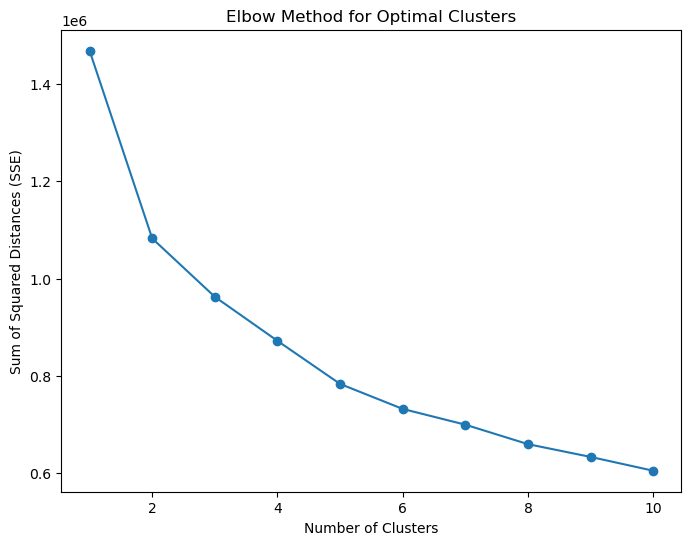

In [29]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# نمودار Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()


# Clustring

In [30]:
km= KMeans(n_clusters=2)
clusters=km.fit_predict(scaled_data)
y = km.fit_predict(scaled_data)
print(y[:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [31]:
unique_labels, counts = np.unique(y, return_counts=True)
for y, count in zip(unique_labels, counts):
    print(f"Cluster {y}: {count} samples")

Cluster 0: 111504 samples
Cluster 1: 1478 samples


In [32]:


correlation_matrix = data.corr()

print(correlation_matrix)


                     Calendar year     Month  ABS remoteness area  \
Calendar year             1.000000  0.000525            -0.009284   
Month                     0.000525  1.000000            -0.000546   
ABS remoteness area      -0.009284 -0.000546             1.000000   
Cause of injury          -0.008458  0.000826            -0.102219   
Age group                 0.010162 -0.001582            -0.012854   
Sex                       0.012978  0.001505             0.012712   
Road user                 0.014931 -0.002994            -0.005000   
Counterparty             -0.001393  0.000639             0.052250   
Count of cases            0.009240  0.003047            -0.069568   
Bed days                  0.003893  0.002784            -0.071736   
Died_cases               -0.026692 -0.000677            -0.043317   
Died_bed_days            -0.024377 -0.000671            -0.044446   
Hospitalisations          0.009441  0.003063            -0.069566   

                     Cause of inj

In [33]:
data['Died_cases'].value_counts()


0.0      103241
1.0        4060
2.0         960
3.0         553
4.0         412
          ...  
445.0         1
636.0         1
996.0         1
565.0         1
677.0         1
Name: Died_cases, Length: 533, dtype: int64

# Classification

In [34]:

data['Outcome'] = ['Dead' if x > data['Died_cases'].all() else 'Live' for x in data['Died_cases']]

data['Outcome'].value_counts()


Live    103241
Dead      9741
Name: Outcome, dtype: int64

Learn with Random Forest

In [35]:
 
features = ['Calendar year', 'Count of cases', 'Bed days',  'Died_bed_days', 'Hospitalisations']

X = data[features]
y = data['Outcome']

X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_rep)



Accuracy: 0.9946010532371554

Classification Report:
               precision    recall  f1-score   support

        Dead       0.94      1.00      0.97      1933
        Live       1.00      0.99      1.00     20664

    accuracy                           0.99     22597
   macro avg       0.97      1.00      0.98     22597
weighted avg       0.99      0.99      0.99     22597



Learn with decesion tree

Accuracy: 99.19%


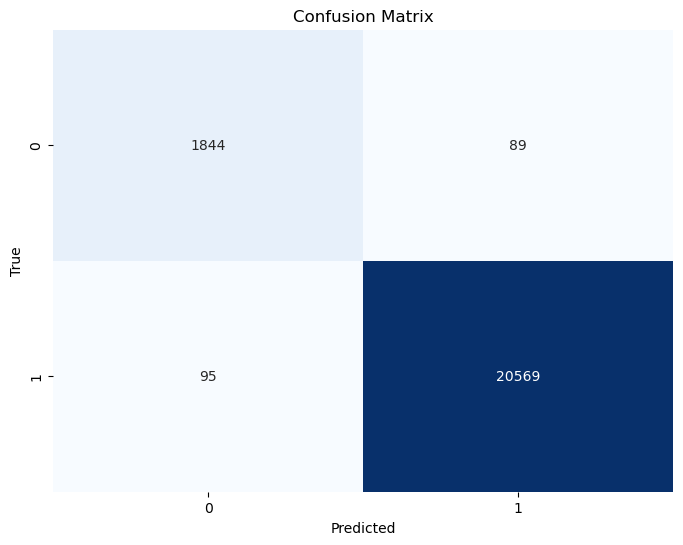

              precision    recall  f1-score   support

        Dead       0.95      0.95      0.95      1933
        Live       1.00      1.00      1.00     20664

    accuracy                           0.99     22597
   macro avg       0.97      0.97      0.97     22597
weighted avg       0.99      0.99      0.99     22597



In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report = classification_report(y_test, predictions)
print(class_report)


LEarn with Logestic Regresion

Logistic Regression Accuracy: 100.00%


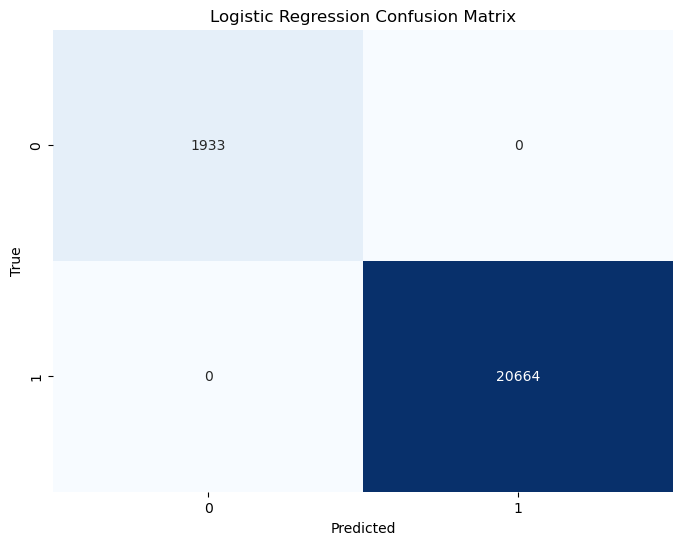

              precision    recall  f1-score   support

        Dead       1.00      1.00      1.00      1933
        Live       1.00      1.00      1.00     20664

    accuracy                           1.00     22597
   macro avg       1.00      1.00      1.00     22597
weighted avg       1.00      1.00      1.00     22597



In [37]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2%}')

logreg_conf_matrix = confusion_matrix(y_test, logreg_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

logreg_class_report = classification_report(y_test, logreg_predictions)
print(logreg_class_report)


Mean Squared Error: 6485701.039643364
R-squared: 0.9724992953024165


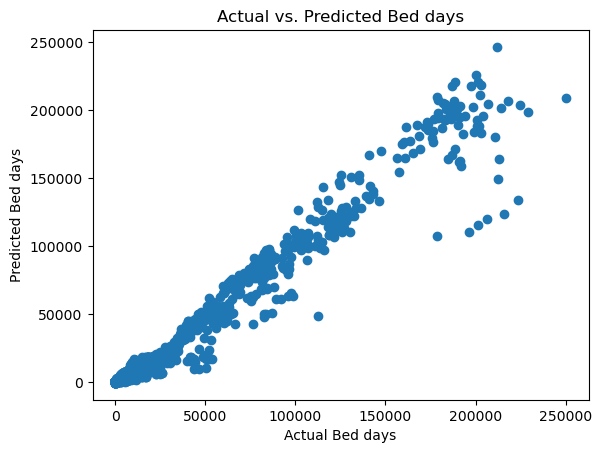

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['Count of cases', 'Died_cases', 'Hospitalisations','ABS remoteness area','Month','Counterparty','Died_bed_days','Calendar year']] 
y = data['Bed days'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

predictions = linear_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, predictions)
plt.xlabel('Actual Bed days')
plt.ylabel('Predicted Bed days')
plt.title('Actual vs. Predicted Bed days')
plt.show()


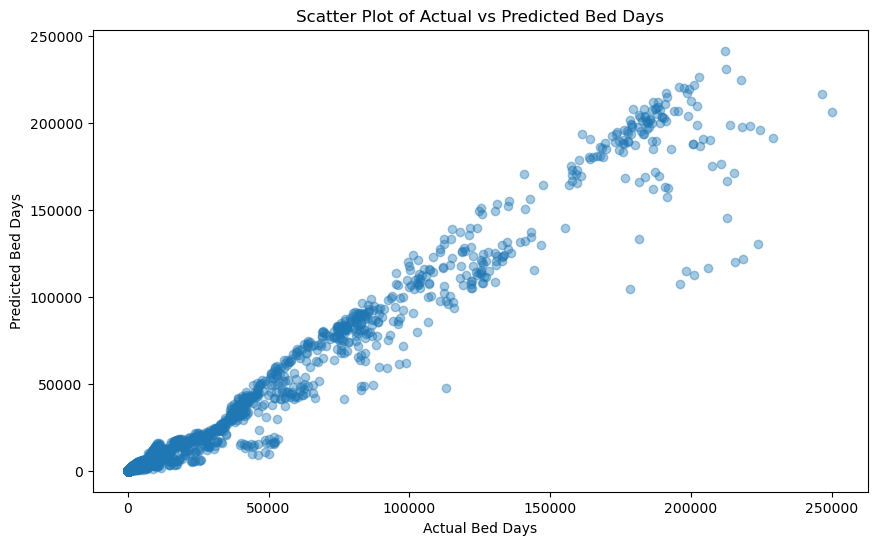

In [39]:
import matplotlib.pyplot as plt

actual_values = data['Bed days']

predictions = linear_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.4)
plt.title('Scatter Plot of Actual vs Predicted Bed Days')
plt.xlabel('Actual Bed Days')
plt.ylabel('Predicted Bed Days')
plt.show()


In [40]:
import pandas as pd

# ایجاد دیتافریم جدید برای نمایش مقادیر واقعی و پیش‌بینی شده
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# چاپ چند سطر از داده‌های نمونه
print(results_df[:100])


        Actual   Predicted
63514      137  162.620691
21407       65  204.451282
21851       20  154.254573
60065       15  170.986808
105798       7  154.254573
...        ...         ...
33186        9  154.254573
2876         1  154.254573
9881        20  156.346102
37431        1  154.254573
25036        6  156.346102

[100 rows x 2 columns]


In [41]:
import pandas as pd

# ایجاد دیتافریم جدید برای نمایش مقادیر واقعی و پیش‌بینی شده
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# چاپ چند سطر از داده‌های نمونه
print(results_df.head())


        Actual   Predicted
63514      137  162.620691
21407       65  204.451282
21851       20  154.254573
60065       15  170.986808
105798       7  154.254573


Mean Squared Error: 3389038.157902778
R-squared: 0.9858286430240346


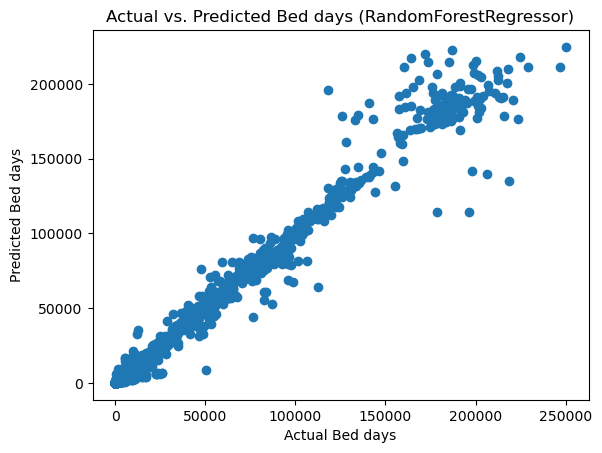

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# جدا کردن ویژگی‌ها و برچسب‌ها
X = data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = data['Bed days']

# تقسیم داده به داده آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ساخت مدل RandomForestRegressor و آموزش
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# پیش‌بینی بر روی داده تست
predictions = rf_model.predict(X_test)

# ارزیابی عملکرد مدل
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# نمودار پراکندگی برای بررسی دقت پیش‌بینی
plt.scatter(y_test, predictions)
plt.xlabel('Actual Bed days')
plt.ylabel('Predicted Bed days')
plt.title('Actual vs. Predicted Bed days (RandomForestRegressor)')
plt.show()


Mean Squared Error: 4771582.721870285
R-squared: 0.9800474946160485


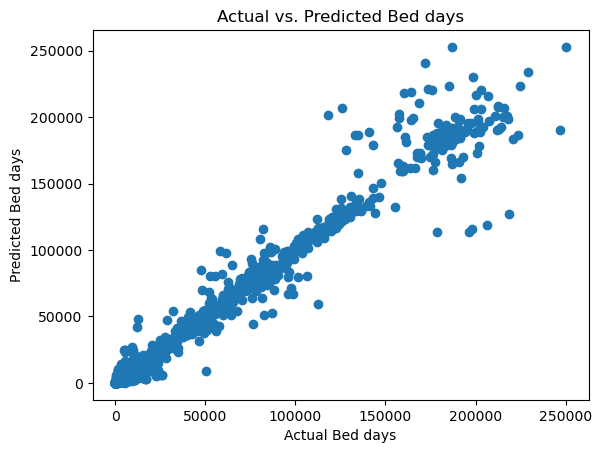

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# انتخاب ویژگی‌ها
X = data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = data['Bed days']

# جدا کردن داده‌ها به دو قسمت آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ساخت مدل گرادیان بوستینگ
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, max_depth=30, random_state=42)
gb_model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمون
predictions = gb_model.predict(X_test)

# محاسبه معیارهای ارزیابی
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# چاپ نتایج
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# رسم نمودار پیش‌بینی واقعی
plt.scatter(y_test, predictions)
plt.xlabel('Actual Bed days')
plt.ylabel('Predicted Bed days')
plt.title('Actual vs. Predicted Bed days')
plt.show()


In [50]:
# ایجاد بازه‌های زمانی
data['Bed_days_category'] = np.where(data['Bed days'] < 30, 'Less than 30 days', '30 days or more')


In [55]:
from sklearn.model_selection import train_test_split

# انتخاب ویژگی‌ها
X = data[['Count of cases', 'Died_cases', 'Hospitalisations','ABS remoteness area','Month','Counterparty','Died_bed_days','Calendar year']]

# انتخاب متغیر وابسته
y = data['Bed_days_category']

# تقسیم داده‌ها به دو بخش آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# آموزش مدل
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = classifier.predict(X_test)

# ارزیابی عملکرد مدل
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.8718

Confusion Matrix:
[[ 8765  2698]
 [ 1648 20784]]

Classification Report:
                   precision    recall  f1-score   support

  30 days or more       0.84      0.76      0.80     11463
Less than 30 days       0.89      0.93      0.91     22432

         accuracy                           0.87     33895
        macro avg       0.86      0.85      0.85     33895
     weighted avg       0.87      0.87      0.87     33895



In [59]:

from sklearn.linear_model import LogisticRegression

# آموزش مدل
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمون
y_logistic_pred = logistic_classifier.predict(X_test)

# ارزیابی عملکرد مدل
accuracy_logistic = accuracy_score(y_test, y_logistic_pred)
conf_matrix_logistic = confusion_matrix(y_test, y_logistic_pred)
class_report_logistic = classification_report(y_test, y_logistic_pred)

print(f'Accuracy (Logistic Regression): {accuracy_logistic:.4f}')
print('\nConfusion Matrix (Logistic Regression):')
print(conf_matrix_logistic)
print('\nClassification Report (Logistic Regression):')
print(class_report_logistic)


Accuracy (Logistic Regression): 0.8905

Confusion Matrix (Logistic Regression):
[[ 8592  2871]
 [  839 21593]]

Classification Report (Logistic Regression):
                   precision    recall  f1-score   support

  30 days or more       0.91      0.75      0.82     11463
Less than 30 days       0.88      0.96      0.92     22432

         accuracy                           0.89     33895
        macro avg       0.90      0.86      0.87     33895
     weighted avg       0.89      0.89      0.89     33895



In [60]:
from Meta import MetaCost


In [61]:
cost_matrix = np.array([[0,3800],[199,0]])
cost_matrix

array([[   0, 3800],
       [ 199,    0]])

In [62]:
metacost_ = MetaCost(estimator=logistic_classifier,cost_matrix=cost_matrix,n_estimators=50,n_samples=None,p=True,q=True)


In [64]:
metacost_.fit(X_train,y_train)


resampling data and training ensemble


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finished training ensemble
evaluating optimal class per observation
Finished re-assigning labels
Training model on new data
Finished training model on data with new labels


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
meta_pred=metacost_.predict(X_test)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [70]:
y_true_numeric = np.where(y_test == '30 days or more', 0, 1)


In [73]:
accuracy_logistic = accuracy_score(y_true_numeric, meta_pred)
accuracy_logistic

0.850538427496681

In [75]:
cm_meta = confusion_matrix(y_true=y_true_numeric,y_pred=meta_pred)
cm_meta

array([[ 6432,  5031],
       [   35, 22397]])

In [77]:
print(f'Accuracy (Logistic Regression): {accuracy_logistic:.4f}')
print('\nConfusion Matrix (Logistic Regression):')
print(conf_matrix_logistic)
print('\nClassification Report (Logistic Regression):')
print(class_report_logistic)


'              precision    recall  f1-score   support\n\n           0       0.99      0.56      0.72     11463\n           1       0.82      1.00      0.90     22432\n\n    accuracy                           0.85     33895\n   macro avg       0.91      0.78      0.81     33895\nweighted avg       0.88      0.85      0.84     33895\n'